<a href="https://colab.research.google.com/github/yangsu0/class_machine_learning/blob/master/ML_Assignment11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [16]:
import numpy as np
import re
import nltk
from sklearn.datasets import load_files
nltk.download('stopwords')
nltk.download('wordnet')
import pickle
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.model_selection import train_test_split

review_data = load_files(r"movie_review")
X, y = review_data.data, review_data.target

documents = []

stemmer = WordNetLemmatizer()

for sen in range(0, len(X)):
    # Remove all the special characters
    document = re.sub(r'\W', ' ', str(X[sen]))
    
    # remove all single characters
    document = re.sub(r'\s+[a-zA-Z]\s+', ' ', document)
    
    # Remove single characters from the start
    document = re.sub(r'\^[a-zA-Z]\s+', ' ', document) 
    
    # Substituting multiple spaces with single space
    document = re.sub(r'\s+', ' ', document, flags=re.I)
    
    # Removing prefixed 'b'
    document = re.sub(r'^b\s+', '', document)
    
    # Converting to Lowercase
    document = document.lower()
    
    # Lemmatization
    document = document.split()
    document = [stemmer.lemmatize(word) for word in document]
    document = ' '.join(document)
    
    documents.append(document)

vectorizer = CountVectorizer(max_features=1500, min_df=5, max_df=0.7, stop_words=stopwords.words('english'))
X = vectorizer.fit_transform(documents).toarray()

tfidfconverter = TfidfTransformer()
X = tfidfconverter.fit_transform(X).toarray()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, shuffle=False) #x = vector, y=label


#(1401, 1500), (601, 1500), (1401,), (601,)
y_train = y_train.reshape((-1, 1))
y_test = y_test.reshape((-1,1))
X_train = X_train.T
X_test = X_test.T
y_train = y_train.T
y_test = y_test.T

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [0]:
#weight & bias parameters

u=np.random.randn(60,1500)
v=np.random.randn(1,60)

b1 = np.zeros((60, 1))
b2 = np.zeros((1, 1))

lamb = 0.725

In [0]:
#define functions
def sigmoid(z):
  return 1/(1+np.exp(-z))

def sigmoid_prime(z):
  return sigmoid(z) * (1 - sigmoid(z))

def object_func(label, sig):
  n = len(u)*len(u[0]) + len(v)*len(v[0])
  return -np.mean(label*np.log(sig) + (1-label)*np.log(1-sig)) + (lamb/(2*n))*(np.sum(np.square(u)) + np.sum(np.square(v)))

In [0]:
loss_train_list = []
loss_test_list = []
acc_train_list = []
acc_test_list = []
u_list = []
v_list = []

b1_list = []
b2_list = []


In [0]:
#y' = u*x
#y = sigmoid(y')
#z' = v*y
#z = sigmoid(z')


def gradient(z_,y_,z,y):
  n = len(u)*len(u[0]) + len(v)*len(v[0]) 
  dz = (z-y_train)/z*(1-z)
  dz_ = np.multiply(dz, sigmoid_prime(z_))
  dv = (1/1401)* np.dot(dz_,z.T)+(1/n)*(lamb)*v
  db2 = (1/1401)* np.sum(dz_, axis=1, keepdims=True)
  dy = np.dot(v.T,dz_)
  dy_ = np.multiply(dy, sigmoid_prime(y_))
  du = (1/1401)* np.dot(dy_,X_train.T)+(1/n)*(lamb)*u
  db1 = (1/1401)* np.sum(dy_, axis=1, keepdims=True)

  return du, dv, db1, db2

In [0]:
def accuracy(label, sig):
  data_len = label.shape[1]
  cnt = 0

  for i in range(data_len):
    if sig[:,i] < 0.5:
      l = 0
    elif sig[:,i] >= 0.5:
      l = 1
    if label[:,i] == l:
      cnt += 1
  return (cnt/data_len) * 100

In [22]:
step_size = 0.425

#Loop while the object function convergence 
past_loss = 0

while(1): 
  y_ = np.dot(u, X_train) + b1
  z_ = np.dot(v, sigmoid(y_)) + b2

  loss = object_func(y_train, sigmoid(z_))
  loss_train_list.append(loss)
  acc = accuracy(y_train, sigmoid(z_))
  acc_train_list.append(acc)
  newu, newv, nb1, nb2 = gradient(z_,y_,sigmoid(z_), sigmoid(y_))
  
  y_t = np.dot(u, X_test) + b1
  z_t = np.dot(v, sigmoid(y_t)) + b2

  loss_test = object_func(y_test, sigmoid(z_t))
  loss_test_list.append(loss_test)
  acc_test = accuracy(y_test, sigmoid(z_t))
  print(acc_test)

  acc_test_list.append(acc_test)

  u -= step_size * newu
  v -= step_size * newv

  b1 -= step_size * nb1
  b2 -= step_size * nb2


  u_list.append(u)
  v_list.append(v)

  b1_list.append(b1)
  b2_list.append(b2)

  #until convergence
#    print(loss)
  if abs(loss-past_loss) < 0.0000000000000000001:
    break
  past_loss = loss

49.25124792013311
49.417637271214645
49.750415973377706
50.74875207986689
50.41597337770383
49.91680532445923
49.08485856905158
49.58402662229617
49.58402662229617
50.41597337770383
49.91680532445923
50.582362728785355
50.249584026622294
49.58402662229617
49.750415973377706
49.91680532445923
50.41597337770383
50.249584026622294
50.249584026622294
50.249584026622294
50.91514143094842
50.74875207986689
50.582362728785355
50.74875207986689
50.74875207986689
50.91514143094842
50.91514143094842
50.91514143094842
50.74875207986689
50.74875207986689
50.582362728785355
50.582362728785355
50.91514143094842
50.91514143094842
50.91514143094842
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
51.08153078202995
50.91514143094842
50.74875207986689
50.91514143094842
50.91514143094842
50.91514143094842
50.91514143094842
50.91514143094842
50.91514143094842
50.91514143094842
50.91514143094842

KeyboardInterrupt: ignored

In [0]:
def classifier(X_data):
  y_ = np.dot(u_list[-1], X_data) + b1_list[-1]
  z_ = np.dot(v_list[-1], sigmoid(y_)) + b2_list[-1]

  z = sigmoid(z_)

  label = []
  data_len = X_data.shape[1]
  for i in range(data_len):
    if z[:,i] < 0.5:
      l = 0
    elif z[:,i] >= 0.5:
      l = 1
    label.append(l)

  return label

In [0]:
y_pred_train = classifier(X_train)
y_pred_test = classifier(X_test)

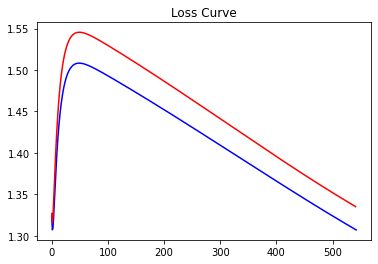

In [25]:
import matplotlib.pyplot as plt
#Plot the loss curve
loss_train_list = np.array(loss_train_list)
loss_test_list = np.array(loss_test_list)

plt.title('Loss Curve')
plt.plot(loss_train_list,'b')
plt.plot(loss_test_list, 'r')

plt.show()

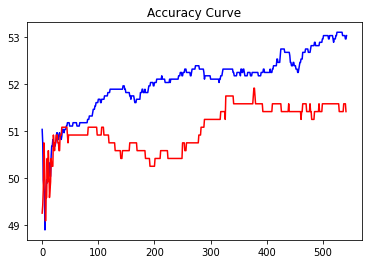

In [26]:
#Plot the accuracy curve
acc_train_list = np.array(acc_train_list)
acc_test_list = np.array(acc_test_list)

plt.title('Accuracy Curve')
plt.plot(acc_train_list,'b')
plt.plot(acc_test_list, 'r')

plt.show()

In [27]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

print(confusion_matrix(y_train.T,np.array(y_pred_train).T))
print(classification_report(y_train.T,np.array(y_pred_train).T))
print(accuracy_score(y_train.T, np.array(y_pred_train).T))

print(confusion_matrix(y_test.T,np.array(y_pred_test).T))
print(classification_report(y_test.T,np.array(y_pred_test).T))
print(accuracy_score(y_test.T, np.array(y_pred_test).T))

[[181 518]
 [140 562]]
              precision    recall  f1-score   support

           0       0.56      0.26      0.35       699
           1       0.52      0.80      0.63       702

    accuracy                           0.53      1401
   macro avg       0.54      0.53      0.49      1401
weighted avg       0.54      0.53      0.49      1401

0.5303354746609564
[[ 68 234]
 [ 58 241]]
              precision    recall  f1-score   support

           0       0.54      0.23      0.32       302
           1       0.51      0.81      0.62       299

    accuracy                           0.51       601
   macro avg       0.52      0.52      0.47       601
weighted avg       0.52      0.51      0.47       601

0.5141430948419301
